# 주제: Intrusion detection

# Data
https://www.kaggle.com/sampadab17/network-intrusion-detection

### 컬럼  
- duration: continuous
    - length (number of seconds) of the connection 
- protocol_type: discrete
    - type of the protocol
        - tcp: Transmission Control Protocol
        - udp: User Datagram Protocol    
        - icmp: Internet Control Message Protocol
- service: descrete
    - network service on the destination
        - http,private,domain_u,smtp,ftp_data등 총66개
- flag: discrete
    - normal or error status of the connection 
        - SF: Normal establish & termination (>0 byte counts)
        - S0: Connection attempt seen, no reply
        - S1: Connection established, not terminated (0 byte counts)
        - S2: Established, ORIG attempts close, no reply from RESP.
        - S3: Established, RESP attempts close, no reply from ORIG.
        - REJ: Connection attempt rejected
        - RSTO: Established, ORIG aborted (RST)
        - RSTR: Established, RESP aborted (RST)
        - RSTOS0: ORIG sent SYN then RST; no RESP SYN-ACK
        - SH: ORIG sent SYN then FIN; no RESP SYN-ACK (“half-open”)
        - OTH: No SYN, not closed. Midstream traffic. Partial connection.
- src_bytes: continuous
    - number of data bytes from source to destination
- dst_bytes: continuous
    - number of data bytes from destination to source 
- land: discrete
    - local area network denial
    - 1 if connection is from/to the same host/port; 0 otherwise
- wrong_fragment: continuous
    - number of wrong fragments 
- urgent: continuous
    - number of urgent packets 
- hot: continuous
    - number of hot indicators
- num_failed_logins: continuous
    - number of failed login attempts 
- logged_in: discrete
    - 1 if successfully logged in; 0 otherwise 
- num_compromised: continuous
    - number of compromised conditions 
- root_shell: discrete
    - 1 if root shell is obtained; 0 otherwise 

# scaler
1. standard scaler
2. min/max scaler

# encoding
1. label encoding
2. onehot enconding
asdfasdf


### 순서
이진분류모델  
 
- decision tree , randomforest, maxdept를 안주고 중요도뽑는다. 
- feature_importances가 0이거나 0에 가까운거 하나씩 줄여가면서 
- 성능좋은 데이터를 만든다.

베이스 모델에 적용  
분류 
- decisiontree
- knn  
- xgboost
- svm
- ensemble
    - randomforest
    - voting
- GradientBoosting
- XGBoost
회귀  
- logistic regression
- 
모델별 hyperparameter 조절로 최적의 모델 선정.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Train_data.csv')

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
df['class']

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

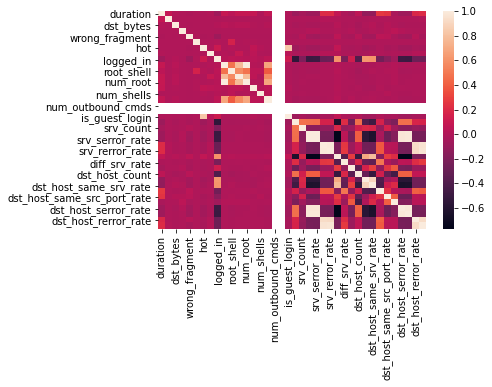

In [8]:
sns.heatmap(df.corr())
plt.show()

In [9]:
df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,...,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719
num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,...,-0.026460,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693
logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,...,-0.395905,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507
num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,...,-0.015637,-0.018220,-0.011794,0.001757,-0.004146,0.013608,-0.007911,-0.007716,-0.007199,-0.004361


In [10]:
df.corr().shape

(38, 38)

In [11]:
df['root_shell'].value_counts()

0    25153
1       39
Name: root_shell, dtype: int64

In [12]:
df['num_failed_logins'].value_counts()

0    25169
1       19
2        2
3        1
4        1
Name: num_failed_logins, dtype: int64

In [13]:
df['num_compromised'].value_counts()

0      24920
1        194
2         21
4         13
6          8
3          7
5          5
12         2
151        2
7          2
884        1
789        1
558        1
462        1
110        1
157        1
13         1
193        1
107        1
457        1
217        1
9          1
520        1
19         1
83         1
38         1
371        1
31         1
Name: num_compromised, dtype: int64

In [14]:
df['hot'].value_counts()

0     24672
2       200
1        78
30       55
28       52
4        37
6        26
5        17
22       13
24        9
19        8
3         7
18        6
14        3
7         2
20        1
25        1
11        1
12        1
77        1
17        1
15        1
Name: hot, dtype: int64

In [15]:
df['urgent'].value_counts()

0    25191
1        1
Name: urgent, dtype: int64

In [16]:
df['logged_in'].value_counts()

0    15247
1     9945
Name: logged_in, dtype: int64

In [17]:
df['land'].value_counts()

0    25190
1        2
Name: land, dtype: int64

In [18]:
df['protocol_type'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [19]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [20]:

df1 = df.select_dtypes(include=['object'])
df2 = df.select_dtypes(include=['float64', 'int64'])
#y_train = df['class']

In [22]:
df1

,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,anomaly
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
25187,tcp,exec,RSTO,anomaly
25188,tcp,ftp_data,SF,anomaly
25189,tcp,private,REJ,anomaly
25190,tcp,nnsp,S0,anomaly


In [23]:
df2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,334,0,0,0,0,0,0,1,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


## Label Encoding

In [25]:
# labelencoding
from sklearn.preprocessing import LabelEncoder
enc_dict={}
def encoding_label(x):
    le = LabelEncoder()
    r = le.fit_transform(x)
    enc_dict[x.name] = le.classes_
    return r

In [26]:
encodingColumns = df1.columns
encodingColumns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [27]:
#le1 = df3[encodingColumns].apply(encoding_label)
le1 = df1[encodingColumns].apply(encoding_label)


In [28]:
le1

,protocol_type,service,flag,class
0,1,19,9,1
1,2,41,9,1
2,1,46,5,0
3,1,22,9,1
4,1,22,9,1
...,...,...,...,...
25187,1,16,2,0
25188,1,19,9,0
25189,1,46,1,0
25190,1,38,5,0


In [29]:
enc_dict['protocol_type'][1], enc_dict['service'][0], enc_dict['class'][0], enc_dict['class'][1]

('tcp', 'IRC', 'anomaly', 'normal')

In [30]:
y_train = le1['class']
y_train

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int32

In [98]:
y_train.dtypes

dtype('int32')

In [31]:
le2 = le1.drop(['class'], axis=1)
le2

,protocol_type,service,flag
0,1,19,9
1,2,41,9
2,1,46,5
3,1,22,9
4,1,22,9
...,...,...,...
25187,1,16,2
25188,1,19,9
25189,1,46,1
25190,1,38,5


## OnehotEncoding

In [99]:
df3 = df1.drop(['class'],axis=1)
y_train_ohe = df['class']

In [106]:
df3

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
25187,tcp,exec,RSTO
25188,tcp,ftp_data,SF
25189,tcp,private,REJ
25190,tcp,nnsp,S0


In [107]:
ohe1 = pd.get_dummies(df3)

In [108]:
ohe1

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
25188,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25189,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25190,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [100]:
y_train_ohe

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

## StandardScaler

In [32]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
scaled1 = scaler.fit_transform(df2)
scaled1

array([[-0.11355066, -0.00988885, -0.03930979, ..., -0.62736475,
        -0.22166806, -0.37428075],
       [-0.11355066, -0.01003196, -0.03930979, ..., -0.62736475,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       ...,
       [-0.11355066, -0.01009252, -0.03930979, ..., -0.62736475,
         2.88429591,  2.77704096],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075]])

In [34]:
scaled_df1 = pd.DataFrame(scaled1, columns=df2.columns)

In [35]:
scaled_df1

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


## data합치기

In [36]:
X_train = pd.concat([le2,scaled_df1],axis=1)

In [37]:
X_train

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [109]:
#data 합치기 ohe
X_train_ohe = pd.concat([ohe1, scaled_df1], axis=1)



In [110]:
X_train_ohe

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,0,0,0,0,0,0,0,0,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,0,0,1,0,0,0,0,0,0,0,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,0,1,0,0,0,0,0,0,0,0,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,0,1,0,0,0,0,0,0,0,0,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,0,1,0,0,0,0,0,0,0,0,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,0,0,0,0,0,0,0,0,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,0,1,0,0,0,0,0,0,0,0,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,0,1,0,0,0,0,0,0,0,0,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,0,1,0,0,0,0,0,0,0,0,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [38]:
# drop columns 1 :num_outbound_cmds, is_host_login
X_train1 = X_train.drop(['num_outbound_cmds','is_host_login'], axis=1)

In [39]:
X_train1

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [40]:
# drop columns 2 :  land
X_train2 = X_train1.drop(['land'], axis=1)
X_train2

,protocol_type,service,flag,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.091223,-0.006301,-0.091933,-0.02622,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [41]:
# drop columns 3 : num_shells
X_train3 = X_train2.drop(['num_shells'], axis=1)
X_train3

,protocol_type,service,flag,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.091223,-0.006301,-0.091933,-0.02622,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [42]:
# num_root                       0.000326
# num_file_creations             0.000198
# num_failed_logins              0.000148
# root_shell                     0.000125
# num_access_files               0.000106
# urgent                         0.000041
# su_attempted                   0.000031
#'num_root','num_file_creations','num_failed_logins','root_shell', 'num_access_files', 'urgent', 'su_attempted'
X_train4 = X_train3.drop(['num_root','num_file_creations','num_failed_logins','root_shell', 'num_access_files', 'urgent', 'su_attempted'],axis=1)
X_train4

,protocol_type,service,flag,duration,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.091223,-0.091933,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.091223,-0.091933,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.091223,-0.091933,1.238197,-0.021873,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [43]:
# drop 5:  is_guest_login
X_train5 = X_train4.drop(['is_guest_login'],axis=1)
X_train5

,protocol_type,service,flag,duration,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.091223,-0.091933,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.091223,-0.091933,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.091223,-0.091933,1.238197,-0.021873,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [44]:
# dst_host_srv_serror_rate       0.009764
# dst_host_srv_rerror_rate       0.005723
# num_compromised                0.005548
# srv_rerror_rate                0.005411
# dst_host_serror_rate           0.005283
# duration                       0.003715
# rerror_rate                    0.003635
# wrong_fragment                 0.003574
# srv_diff_host_rate             0.001994
# 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate','num_compromised','srv_rerror_rate','dst_host_serror_rate','duration','rerror_rate','wrong_fragment','srv_diff_host_rate'
X_train6 = X_train5.drop(['dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate',
                         'num_compromised','srv_rerror_rate','dst_host_serror_rate',
                         'duration','rerror_rate','wrong_fragment','srv_diff_host_rate'],axis=1)
X_train6

,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
0,1,19,9,-0.009889,-0.039310,-0.091933,-0.807626,-0.720244,-0.354628,-0.640142,-0.633978,0.772109,-0.349282,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.221668
1,2,41,9,-0.010032,-0.039310,-0.091933,-0.807626,-0.624317,-0.368427,-0.640142,-0.633978,-1.320567,0.490836,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.385140
2,1,46,5,-0.010093,-0.039310,-0.091933,-0.807626,0.334947,-0.299430,1.595477,1.600209,-1.388806,0.042773,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,-0.385140
3,1,22,9,-0.009996,0.052473,-0.091933,1.238197,-0.694082,-0.313230,-0.193018,-0.187141,0.772109,-0.349282,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.385140
4,1,22,9,-0.010010,-0.034582,-0.091933,1.238197,-0.476067,0.059355,-0.640142,-0.633978,0.772109,-0.349282,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.385140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.010093,-0.039310,-0.091933,-0.807626,0.134374,-0.285631,-0.640142,-0.633978,-1.343313,0.042773,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,2.884296
25188,1,19,9,-0.009954,-0.039310,-0.091933,1.238197,-0.728964,-0.368427,-0.640142,-0.633978,0.772109,-0.349282,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.385140
25189,1,46,1,-0.010093,-0.039310,-0.091933,-0.807626,0.177977,-0.285631,-0.640142,-0.633978,-1.343313,0.042773,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,2.884296
25190,1,38,5,-0.010093,-0.039310,-0.091933,-0.807626,0.387271,-0.133837,1.595477,1.600209,-1.184088,-0.013235,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,-0.385140


### ohe data 

In [111]:
# ohe drop 1 :num_outbound_cmds, is_host_login
X_train_ohe1 = X_train_ohe.drop(['num_outbound_cmds','is_host_login'], axis=1)

In [112]:
# ohe drop 2  :  land
X_train_ohe2 = X_train_ohe1.drop(['land'], axis=1)

In [113]:
# ohe drop 3  : num_shells
X_train_ohe3 = X_train_ohe2.drop(['num_shells'], axis=1)

In [114]:
# ohe drop 4  :  #'num_root','num_file_creations','num_failed_logins','root_shell', 'num_access_files', 'urgent', 'su_attempted'
X_train_ohe4 = X_train_ohe3.drop(['num_root','num_file_creations','num_failed_logins','root_shell', 'num_access_files', 'urgent', 'su_attempted'],axis=1)

In [115]:
# ohe drop 5  : is_guest_login
X_train_ohe5 = X_train_ohe4.drop(['is_guest_login'], axis=1)

In [116]:
# ohe drop 6  : # 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate','num_compromised','srv_rerror_rate','dst_host_serror_rate','duration','rerror_rate','wrong_fragment','srv_diff_host_rate'
X_train_ohe6 = X_train_ohe5.drop(['dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate',
                         'num_compromised','srv_rerror_rate','dst_host_serror_rate',
                         'duration','rerror_rate','wrong_fragment','srv_diff_host_rate'],axis=1)

## Feature importance

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [46]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

fi = tree.feature_importances_
fi_s = pd.Series(fi, index=X_train.columns)

pred_train = tree.predict(X_train)
accuracy_score(y_train, pred_train)

0.9999603048586853

In [47]:
print(classification_report(y_train, pred_train ,target_names=['anomaly', 'normal']))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00     11743
      normal       1.00      1.00      1.00     13449

    accuracy                           1.00     25192
   macro avg       1.00      1.00      1.00     25192
weighted avg       1.00      1.00      1.00     25192



In [252]:
def getScore(x):
    rf = RandomForestClassifier(max_depth=5, random_state=1)
    rf.fit(x, y_train)
    
    fi_rf = rf.feature_importances_
    fi_rfs = pd.Series(fi_rf, index=x.columns)
  
    fi_rfs.sort_values(ascending=False).plot(kind='bar', figsize=(10,3))
    plt.show()

    pred_train_rf =rf.predict(x)
    accuracy = accuracy_score(y_train, pred_train_rf)
    print(accuracy)
    print(confusion_matrix(y_train, pred_train_rf))

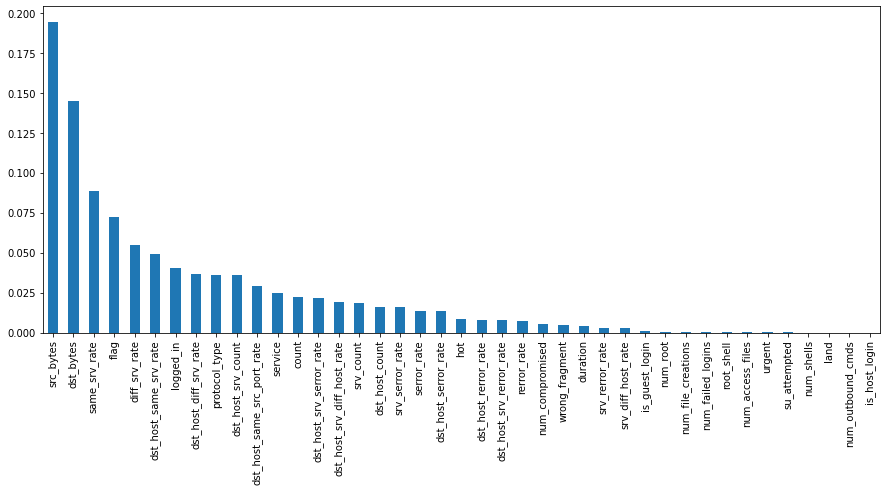

0.9999603048586853
[[11743     0]
 [    1 13448]]


In [231]:
getScore(X_train)

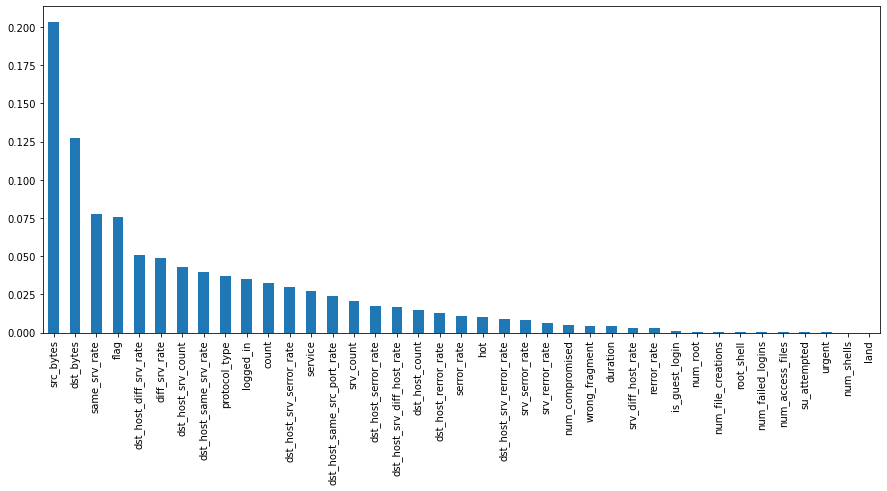

0.9999603048586853
[[11743     0]
 [    1 13448]]


In [232]:
getScore(X_train1)

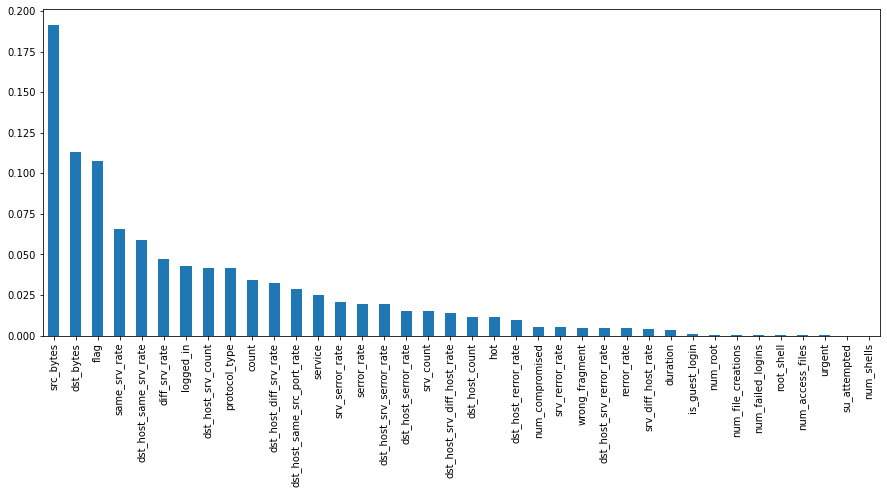

0.9999603048586853
[[11743     0]
 [    1 13448]]


In [233]:
getScore(X_train2)

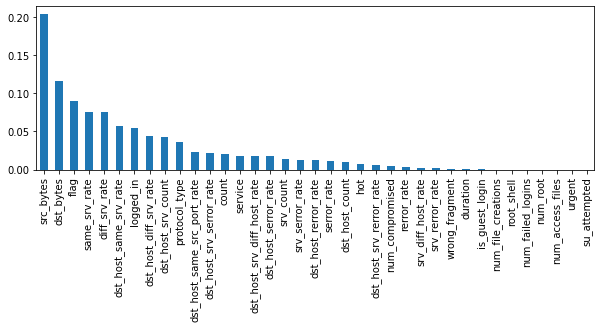

0.9851143220069863
[[11448   295]
 [   80 13369]]


In [253]:
getScore(X_train3)

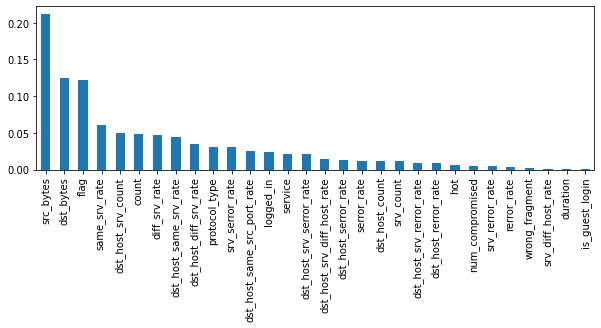

0.9866227373769451
[[11441   302]
 [   35 13414]]


In [254]:
getScore(X_train4)

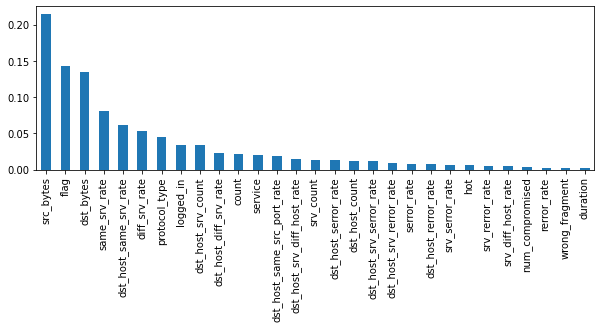

0.9865036519530009
[[11458   285]
 [   55 13394]]


In [255]:
getScore(X_train5)

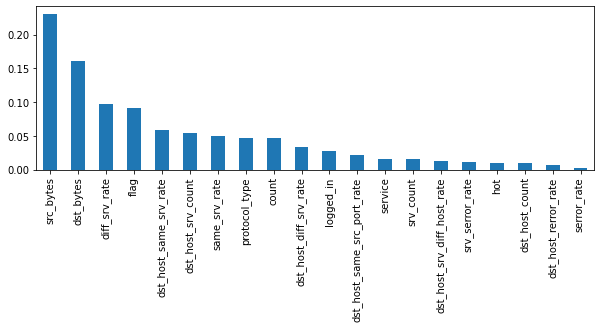

0.987297554779295
[[11464   279]
 [   41 13408]]


In [256]:
getScore(X_train6)

In [245]:
print(classification_report(y_train, pred_train_rf, target_names=['anomaly','normal']))

              precision    recall  f1-score   support

     anomaly       1.00      0.97      0.99     11743
      normal       0.98      1.00      0.99     13449

    accuracy                           0.99     25192
   macro avg       0.99      0.99      0.99     25192
weighted avg       0.99      0.99      0.99     25192



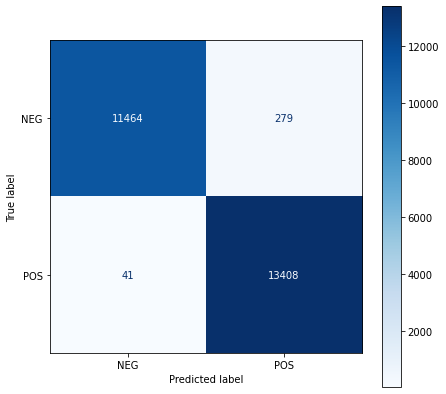

In [64]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
plot_confusion_matrix(rf,
                      X_train6,
                      y_train,
                      display_labels=['NEG','POS'],
                      cmap='Blues',
                      ax=ax)
plt.show()

In [257]:
def getScoreohe(x):
    rfall = RandomForestClassifier(max_depth=5, random_state=1)
    rfall.fit(x, y_train)
    pred_train_rf_ohe =rfall.predict(x)
    
    fi_rfohe = rfall.feature_importances_
    fi_rfsohe = pd.Series(fi_rfohe, index=x.columns)
    
    fi_rfsohe.sort_values(ascending=False).plot(kind='bar', figsize=(10,3))
    plt.show()
    accuracy = accuracy_score(y_train, pred_train_rf_ohe)
    print(accuracy)
    print(confusion_matrix(y_train, pred_train_rf_ohe))

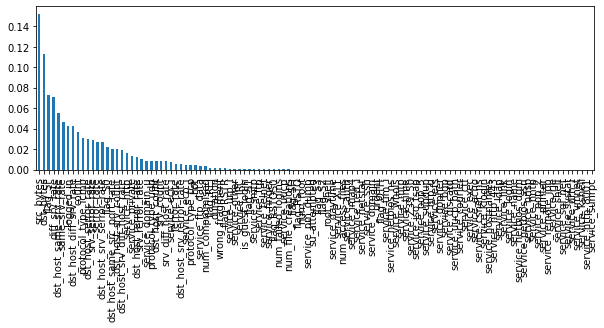

0.9829707843759924
[[11384   359]
 [   70 13379]]


In [258]:
getScoreohe(X_train_ohe3)

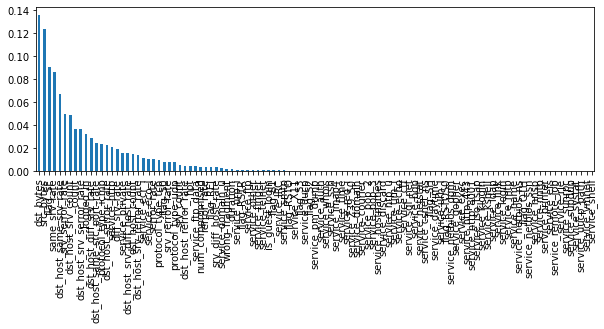

0.9777707208637663
[[11262   481]
 [   79 13370]]


In [259]:
getScoreohe(X_train_ohe4)

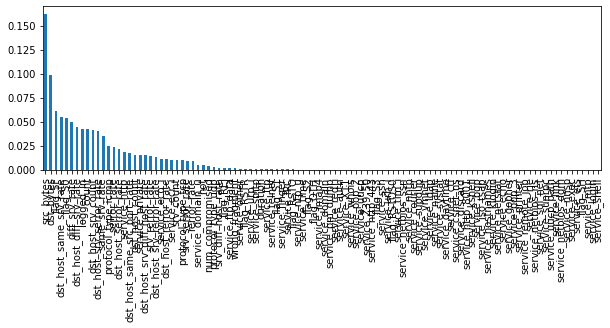

0.980350905049222
[[11310   433]
 [   62 13387]]


In [260]:
getScoreohe(X_train_ohe5)

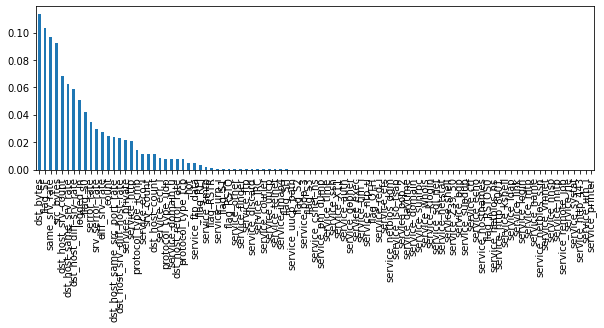

0.9777707208637663
[[11219   524]
 [   36 13413]]


In [261]:
getScoreohe(X_train_ohe6)

In [173]:
fi_rfsohe.sort_values(ascending=False)

dst_bytes                 0.137865
src_bytes                 0.112045
flag_SF                   0.103960
same_srv_rate             0.096471
dst_host_same_srv_rate    0.066064
                            ...   
service_remote_job        0.000000
service_red_i             0.000000
service_printer           0.000000
service_pop_2             0.000000
service_shell             0.000000
Length: 107, dtype: float64

In [174]:
print(classification_report(y_train_ohe, pred_train_rf_ohe))

              precision    recall  f1-score   support

     anomaly       0.99      0.94      0.97     11743
      normal       0.95      0.99      0.97     13449

    accuracy                           0.97     25192
   macro avg       0.97      0.97      0.97     25192
weighted avg       0.97      0.97      0.97     25192



In [265]:
from sklearn.decomposition import PCA
def get_pca(x, num):
    pca = PCA(n_components=num) # 주성분을 몇개로 할지 결정
    pcacompo = pca.fit_transform(x)
    pcadf = pd.DataFrame(pcacompo)#, colum)
    print(pca.explained_variance_ratio_)#,pca.explained_variance_)
    print('pca sum: ',pca.explained_variance_ratio_.sum())
#     print(pcacompo)
#     print(pcadf)

In [266]:
get_pca(X_train4,10)

[0.88251779 0.04062655 0.02025034 0.00704921 0.00674681 0.00669537
 0.00453761 0.00415219 0.00369719 0.00366906]
pca sum:  0.9799421316271044


In [262]:
get_pca(X_train_ohe1, 10)

[0.19766828 0.13264834 0.0964656  0.05285842 0.05041071 0.04658674
 0.03493813 0.03032558 0.02818982 0.02745317]
pca sum:  0.6975448018285018
[[ 7.49245461e-01 -6.52467914e-02 -4.55833951e-02 ...  2.11256731e-02
  -1.42335080e-02 -1.61054001e-01]
 [-4.58496651e-01  1.13060682e+00 -3.48893333e-02 ... -1.12589605e+00
   1.87748855e-02  9.14726749e-02]
 [-3.85600580e+00 -1.47402332e+00  5.10160521e-02 ...  1.50690134e-01
  -4.22449615e-02  3.87092770e-03]
 ...
 [-1.39680211e+00  5.61803459e+00 -1.61733355e-01 ...  3.14858968e-01
   2.05618792e-02 -2.35206083e-01]
 [-3.76292770e+00 -1.49701751e+00  4.98129017e-02 ...  1.99015963e-01
  -3.28004496e-02  3.56482454e-02]
 [-3.36642938e+00 -1.58631730e+00  4.73799326e-02 ...  1.42006315e-01
  -5.51754214e-02  2.49913356e-02]]
              0         1         2         3         4         5         6  \
0      0.749245 -0.065247 -0.045583 -0.120953  0.337222  0.231923  0.615497   
1     -0.458497  1.130607 -0.034889 -1.274459  1.069167  1.81827

In [203]:
X_train_ohe5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Columns: 106 entries, protocol_type_icmp to dst_host_srv_rerror_rate
dtypes: float64(26), uint8(80)
memory usage: 6.9 MB


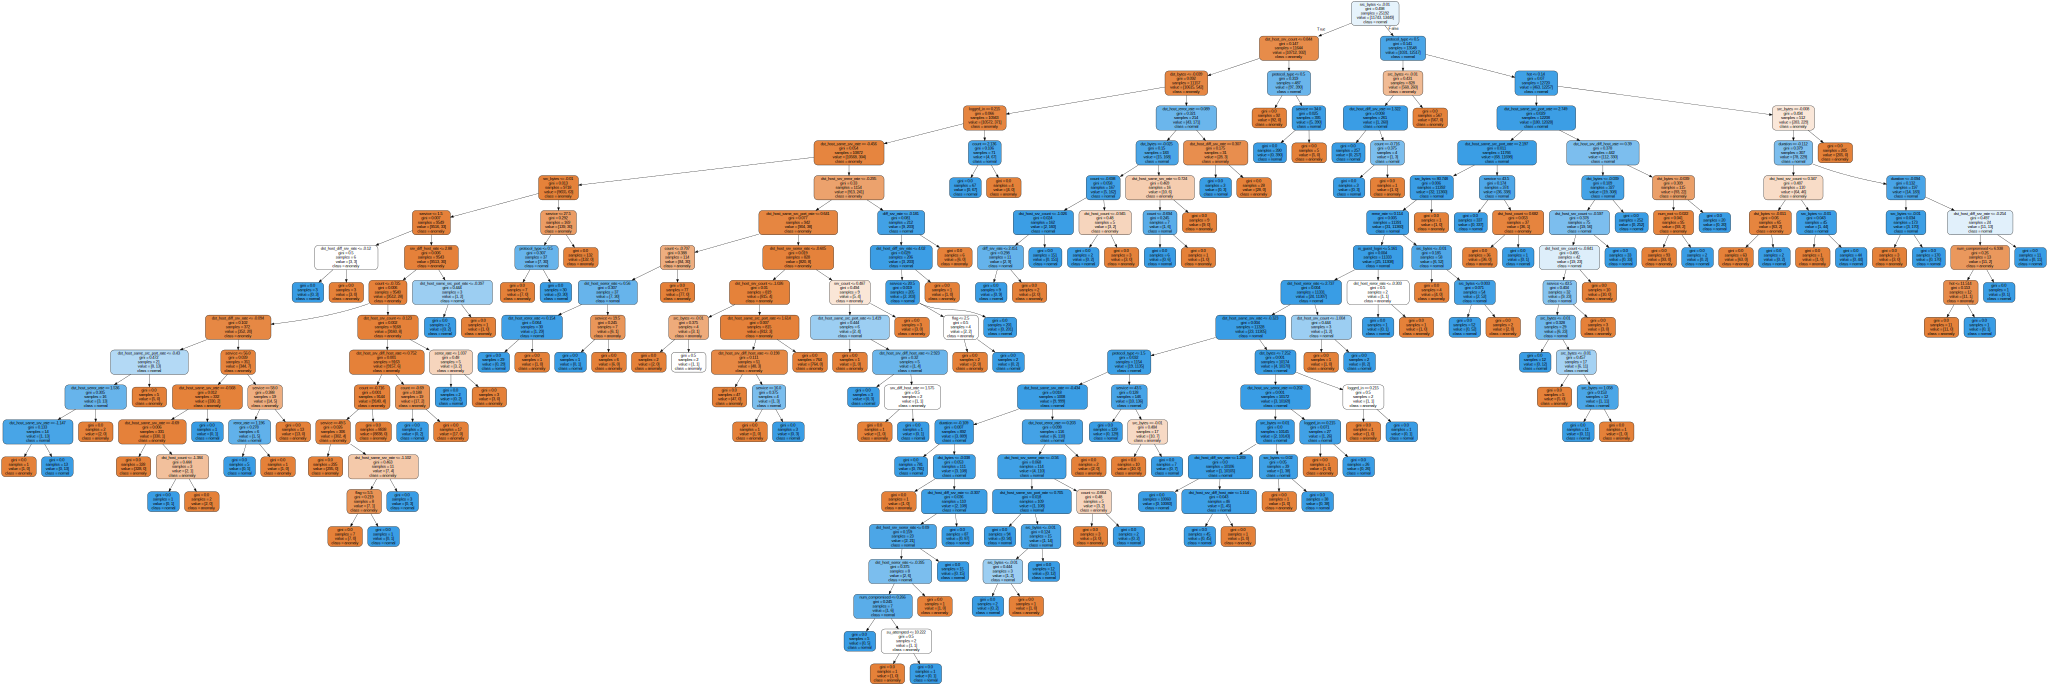

In [66]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree,
                               out_file=None,
                               feature_names=X_train.columns,
                               class_names=['anomaly','normal'],
                              filled=True, rounded=True))
graph

In [67]:
fi_s.sort_values(ascending=False)

src_bytes                      0.754763
protocol_type                  0.064912
dst_host_srv_count             0.047484
dst_bytes                      0.024087
dst_host_srv_rerror_rate       0.023224
hot                            0.022835
service                        0.011472
logged_in                      0.009669
dst_host_srv_diff_host_rate    0.008214
dst_host_same_srv_rate         0.007906
dst_host_same_src_port_rate    0.006326
count                          0.004391
duration                       0.003603
dst_host_rerror_rate           0.003431
dst_host_diff_srv_rate         0.002707
diff_srv_rate                  0.001164
dst_host_serror_rate           0.000958
dst_host_srv_serror_rate       0.000598
dst_host_count                 0.000453
num_root                       0.000312
flag                           0.000299
srv_diff_host_rate             0.000291
rerror_rate                    0.000227
serror_rate                    0.000191
num_compromised                0.000181


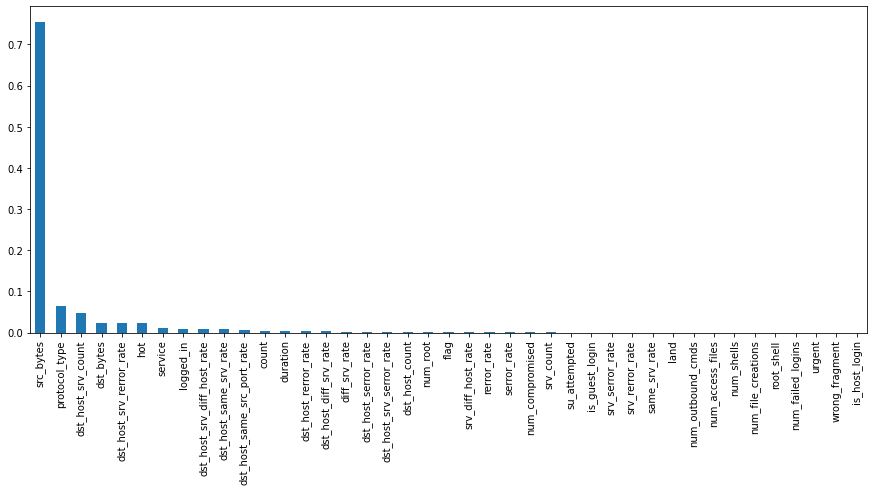

In [68]:
# DecisionTree
fi_s.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

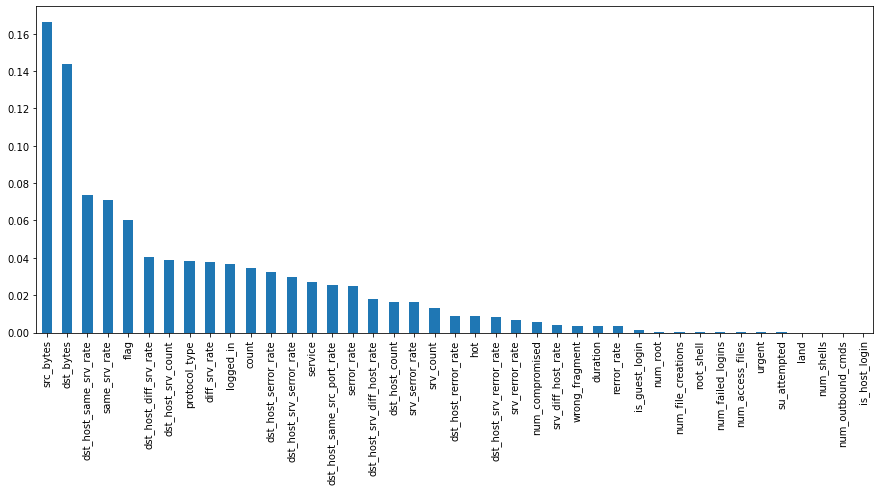

In [69]:
# randomforest
fi_rfs.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

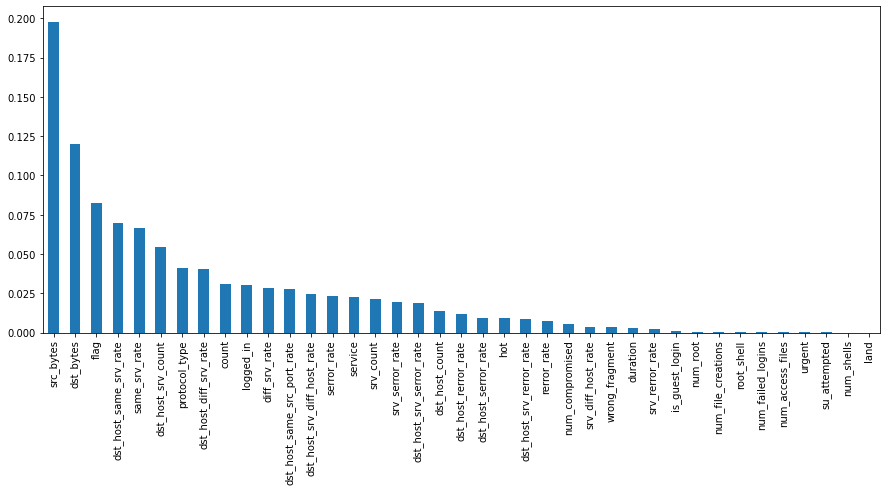

In [70]:
# randomforest, X_train1
fi_rfs1.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

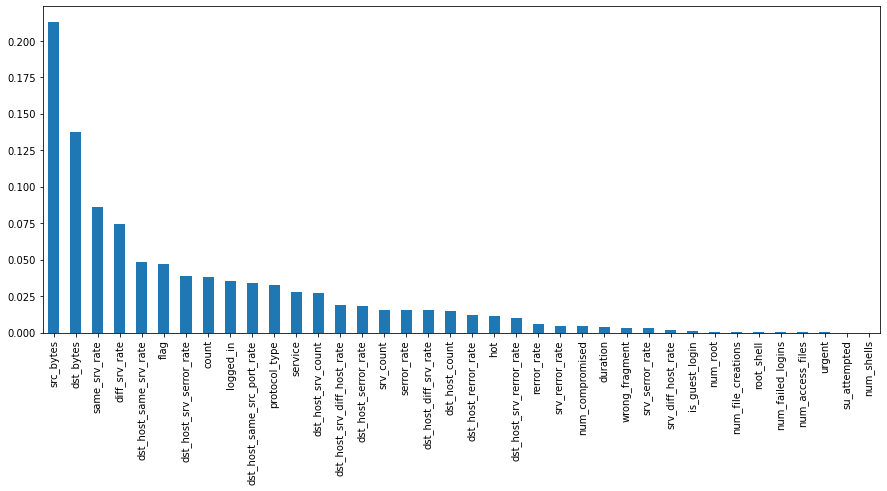

In [71]:
# randomforest, X_train2
fi_rfs2.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

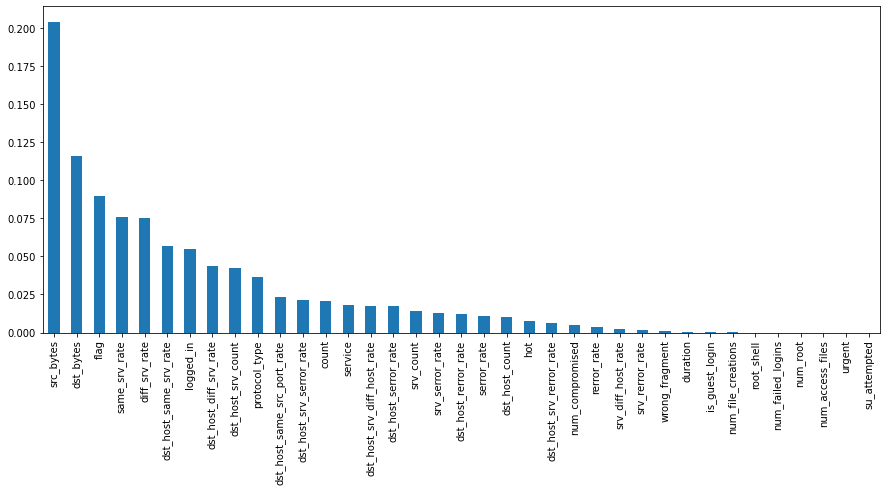

In [72]:
# randomforest, X_train3
fi_rfs3.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

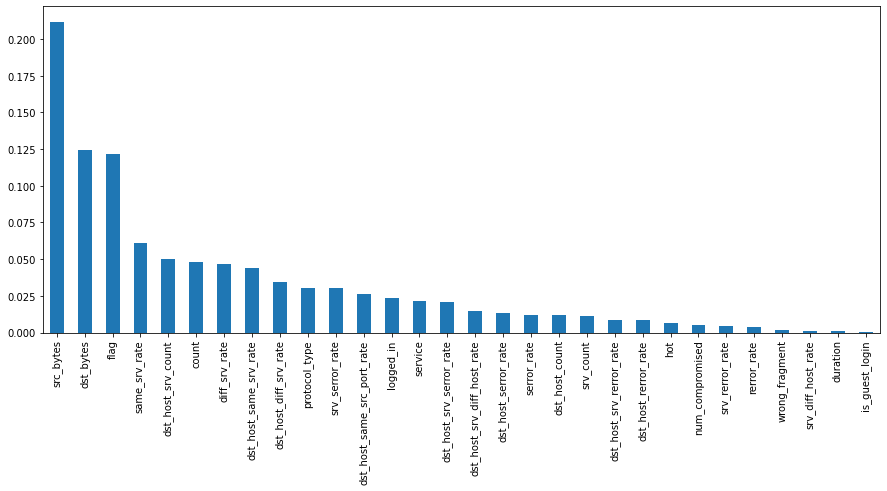

In [73]:
# randomforest, X_train4
fi_rfs4.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

In [74]:
fi_rfs4.sort_values(ascending=False)

src_bytes                      0.211686
dst_bytes                      0.124377
flag                           0.122002
same_srv_rate                  0.061127
dst_host_srv_count             0.050139
count                          0.048188
diff_srv_rate                  0.046633
dst_host_same_srv_rate         0.044245
dst_host_diff_srv_rate         0.034505
protocol_type                  0.030515
srv_serror_rate                0.030466
dst_host_same_src_port_rate    0.025946
logged_in                      0.023288
service                        0.021295
dst_host_srv_serror_rate       0.021083
dst_host_srv_diff_host_rate    0.014690
dst_host_serror_rate           0.013535
serror_rate                    0.011810
dst_host_count                 0.011770
srv_count                      0.011465
dst_host_srv_rerror_rate       0.008800
dst_host_rerror_rate           0.008274
hot                            0.006789
num_compromised                0.004872
srv_rerror_rate                0.004619


In [75]:
fi_rfs4.sort_values(ascending=False)

src_bytes                      0.211686
dst_bytes                      0.124377
flag                           0.122002
same_srv_rate                  0.061127
dst_host_srv_count             0.050139
count                          0.048188
diff_srv_rate                  0.046633
dst_host_same_srv_rate         0.044245
dst_host_diff_srv_rate         0.034505
protocol_type                  0.030515
srv_serror_rate                0.030466
dst_host_same_src_port_rate    0.025946
logged_in                      0.023288
service                        0.021295
dst_host_srv_serror_rate       0.021083
dst_host_srv_diff_host_rate    0.014690
dst_host_serror_rate           0.013535
serror_rate                    0.011810
dst_host_count                 0.011770
srv_count                      0.011465
dst_host_srv_rerror_rate       0.008800
dst_host_rerror_rate           0.008274
hot                            0.006789
num_compromised                0.004872
srv_rerror_rate                0.004619


In [ ]:
/dst_host_srv_rerror_rate       0.008401
/srv_serror_rate                0.007918
/rerror_rate                    0.005366
/num_compromised                0.005136
/wrong_fragment                 0.004000
/duration                       0.003472
/srv_rerror_rate                0.003217
serror_rate                    0.003182
/srv_diff_host_rate             0.002089
/is_guest_login                 0.000924

In [ ]:
dst_host_srv_rerror_rate       0.005485
num_compromised                0.004400
srv_serror_rate                0.003546
wrong_fragment                 0.002272
dst_host_serror_rate           0.002006
srv_diff_host_rate             0.001501
rerror_rate                    0.001419
duration                       0.001267
srv_rerror_rate                0.001234
is_guest_login                 0.000203

In [76]:
fi_rfs5.sort_values(ascending=False)

src_bytes                      0.227013
flag                           0.154566
dst_bytes                      0.138060
same_srv_rate                  0.089264
dst_host_same_srv_rate         0.063465
diff_srv_rate                  0.057991
protocol_type                  0.040520
dst_host_srv_count             0.033793
logged_in                      0.032018
dst_host_diff_srv_rate         0.027778
count                          0.018516
service                        0.012851
dst_host_srv_serror_rate       0.012323
dst_host_serror_rate           0.012249
dst_host_same_src_port_rate    0.012031
dst_host_count                 0.010161
serror_rate                    0.007793
dst_host_srv_rerror_rate       0.007618
dst_host_srv_diff_host_rate    0.007341
srv_count                      0.006771
srv_serror_rate                0.006460
dst_host_rerror_rate           0.004916
hot                            0.004345
srv_diff_host_rate             0.004325
srv_rerror_rate                0.002961


In [77]:
#dept=max
fi_rfs5.sort_values(ascending=False)

src_bytes                      0.227013
flag                           0.154566
dst_bytes                      0.138060
same_srv_rate                  0.089264
dst_host_same_srv_rate         0.063465
diff_srv_rate                  0.057991
protocol_type                  0.040520
dst_host_srv_count             0.033793
logged_in                      0.032018
dst_host_diff_srv_rate         0.027778
count                          0.018516
service                        0.012851
dst_host_srv_serror_rate       0.012323
dst_host_serror_rate           0.012249
dst_host_same_src_port_rate    0.012031
dst_host_count                 0.010161
serror_rate                    0.007793
dst_host_srv_rerror_rate       0.007618
dst_host_srv_diff_host_rate    0.007341
srv_count                      0.006771
srv_serror_rate                0.006460
dst_host_rerror_rate           0.004916
hot                            0.004345
srv_diff_host_rate             0.004325
srv_rerror_rate                0.002961
